In [1]:
import pandas as pd
import seaborn as sns
from glob import glob 
import os
import matplotlib.pyplot as plt

In [2]:
def parse_track_model(filename):
    folder, model_folder = os.path.split(filename[:-1])
    config = model_folder.split("_")
    date = config[0]
    model_name = "_".join(config[-4:])
    agg = "_".join(config[-6:-4])
    dataset = "_".join(config[1:-6])
    
    mAP_csv = os.path.join(filename + "mAP.csv")
    mAP_df = pd.read_csv(mAP_csv)
    min15, day1 = mAP_df.mAP.values
    
    
    cmc_csv = os.path.join(filename + "results.csv")
    cmc_df = pd.read_csv(cmc_csv)
    rank1_same_hour = cmc_df.loc[0, "test_same_hour"]
    rank1_diff_day_same_hour = cmc_df.loc[0, "test_different_day_same_hour"]
    rank1_diff_day = cmc_df.loc[0, "test_different_day"]
    
    config_dict = {
        "date": date,
        "model_name": model_name,
        "agg": agg,
        "dataset": dataset,
        "mAP15min": min15,
        "mAPday1":day1,
        "rank1_same_hour": rank1_same_hour,
        "rank1_diff_day_same_hour": rank1_diff_day_same_hour,
        "rank1_diff_day": rank1_diff_day,
        "filename": filename
    }
    return config_dict

def parse_image_model(filename):
    folder, model_folder = os.path.split(filename[:-1])
    config = model_folder.split("_")
    date = config[0]
    model_name = "_".join(config[-4:])
    dataset = "_".join(config[1:-4])
    
    mAP_csv = os.path.join(filename + "mAP.csv")
    mAP_df = pd.read_csv(mAP_csv)
    min15, day1 = mAP_df.mAP.values
    
    
    cmc_csv = os.path.join(filename + "results.csv")
    cmc_df = pd.read_csv(cmc_csv)
    rank1_same_hour = cmc_df.loc[0, "test_same_hour"]
    rank1_diff_day_same_hour = cmc_df.loc[0, "test_different_day_same_hour"]
    rank1_diff_day = cmc_df.loc[0, "test_different_day"]
    
    config_dict = {
        "date": date,
        "model_name": model_name,
        "dataset": dataset,
        "mAP15min": min15,
        "mAPday1":day1,
        "rank1_same_hour": rank1_same_hour,
        "rank1_diff_day_same_hour": rank1_diff_day_same_hour,
        "rank1_diff_day": rank1_diff_day,
        "filename": filename
    }
    return config_dict

def parse_model_folder(filename):
    folder, file = os.path.split(filename)
    if "track" in file:
        return parse_track_model(filename)
    else:
        return parse_image_model(filename)

In [4]:
# files = glob("track_models/*/")
# parsed_filename = [parse_file(f) for f in files]
# track_benchmark = pd.DataFrame(parsed_filename)
# track_benchmark["level"] = "track"

# images_files = glob("models/*128/")
# parsed_filename = [parse_image_file(fi) for fi in images_files]
# track_image_benchmark = pd.DataFrame(parsed_filename)
# track_image_benchmark["agg"] = "image"
# track_image_benchmark["level"] = "image"

In [8]:
df= pd.concat([track_benchmark, track_image_benchmark]).reset_index(drop=True)

In [9]:
df

,date,model_name,agg,dataset,mAP15min,mAPday1,rank1_same_hour,rank1_diff_day_same_hour,rank1_diff_day,filename,level
0,2110262205,simplecnnv2_convb3_dim_128,track_attention,tagged_augmentataion_untagged_augmentataion,0.652095,0.504437,0.714711,0.571857,0.510579,track_models/2110262205_tagged_augmentataion_u...,track
1,2110262159,simplecnnv2_convb3_dim_128,track_attention,tagged_untagged,0.478085,0.311306,0.632395,0.547932,0.424444,track_models/2110262159_tagged_untagged_track_...,track
2,2110261639,simplecnnv2_convb3_dim_128,track_attention,untagged,0.273464,0.151634,0.556737,0.352869,0.267176,track_models/2110261639_untagged_track_attenti...,track
3,2110260915,simplecnnv2_convb3_dim_128,Track_mean,tagged_augmentataion_untagged_augmentataion,0.716227,0.540514,0.755184,0.662489,0.586136,track_models/2110260915_tagged_augmentataion_u...,track
4,2110261353,simplecnnv2_convb3_dim_128,track_attention,untagged_augmentataion,0.516941,0.301584,0.711500,0.494051,0.443733,track_models/2110261353_untagged_augmentataion...,track
5,2110252243,simplecnnv2_convb3_dim_128,Track_mean,untagged_augmentataion,0.504256,0.328606,0.725500,0.524008,0.413943,track_models/2110252243_untagged_augmentataion...,track
6,2110260212,simplecnnv2_convb3_dim_128,Track_mean,tagged_augmentataion,0.341462,0.323416,0.491316,0.325612,0.308980,track_models/2110260212_tagged_augmentataion_T...,track
7,2110261615,simplecnnv2_convb3_dim_128,track_attention,tagged_augmentataion,0.289300,0.153153,0.477447,0.272700,0.228664,track_models/2110261615_tagged_augmentataion_t...,track
8,2110260454,simplecnnv2_convb3_dim_128,Track_mean,tagged,0.200517,0.165613,0.388000,0.318565,0.244951,track_models/2110260454_tagged_Track_mean_simp...,track
9,2110260232,simplecnnv2_convb3_dim_128,Track_mean,untagged,0.247110,0.180939,0.565447,0.312025,0.256030,track_models/2110260232_untagged_Track_mean_si...,track


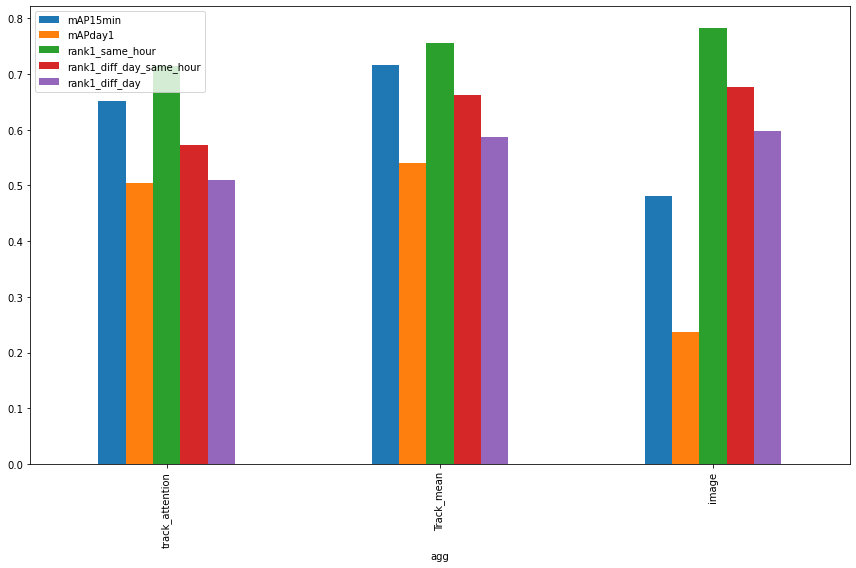

In [21]:
plt.figure(figsize=(12, 8))
ax=plt.gca()
dataset = "tagged_augmentataion_untagged_augmentataion"
df[df.dataset == dataset].plot(x="agg", kind="bar", ax=ax)
plt.tight_layout()
plt.savefig("{}.png".format(dataset))

<AxesSubplot:xlabel='agg'>

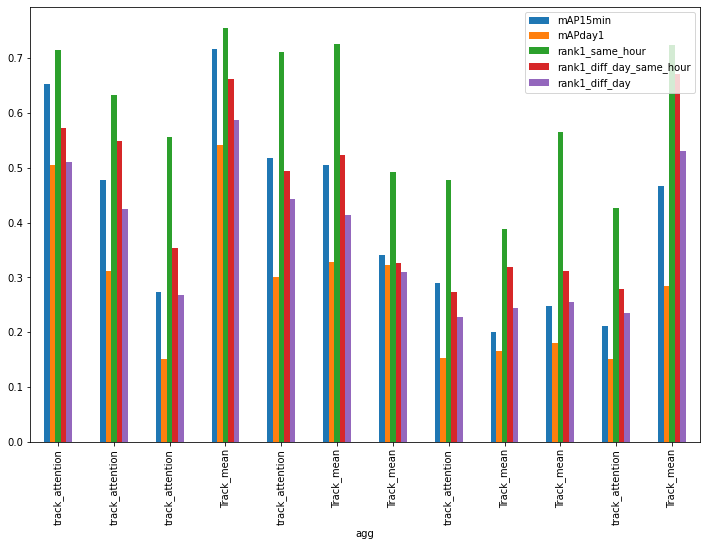

In [28]:
plt.figure(figsize=(12, 8))
ax=plt.gca()
track_benchmark.plot(x="agg", kind="bar", ax=ax)

In [22]:
df.sort_values("mAP15min")

,date,model_name,agg,dataset,mAP15min,mAPday1,rank1_same_hour,rank1_diff_day_same_hour,rank1_diff_day,filename,level
15,2110212348,simplecnnv2_convb3_dim_128,image,tagged,0.170602,0.057813,0.487421,0.369916,0.288269,models/2110212348_tagged_simplecnnv2_convb3_di...,image
8,2110260454,simplecnnv2_convb3_dim_128,Track_mean,tagged,0.200517,0.165613,0.388000,0.318565,0.244951,track_models/2110260454_tagged_Track_mean_simp...,track
14,2110211658,simplecnnv2_convb3_dim_128,image,tagged_augmentataion,0.202024,0.103941,0.493000,0.450127,0.392442,models/2110211658_tagged_augmentataion_simplec...,image
10,2110261941,simplecnnv2_convb3_dim_128,track_attention,tagged,0.211734,0.151087,0.427421,0.279283,0.235958,track_models/2110261941_tagged_track_attention...,track
9,2110260232,simplecnnv2_convb3_dim_128,Track_mean,untagged,0.247110,0.180939,0.565447,0.312025,0.256030,track_models/2110260232_untagged_Track_mean_si...,track
2,2110261639,simplecnnv2_convb3_dim_128,track_attention,untagged,0.273464,0.151634,0.556737,0.352869,0.267176,track_models/2110261639_untagged_track_attenti...,track
13,2110211736,simplecnnv2_convb3_dim_128,image,untagged,0.288123,0.138004,0.629579,0.427426,0.366557,models/2110211736_untagged_simplecnnv2_convb3_...,image
7,2110261615,simplecnnv2_convb3_dim_128,track_attention,tagged_augmentataion,0.289300,0.153153,0.477447,0.272700,0.228664,track_models/2110261615_tagged_augmentataion_t...,track
6,2110260212,simplecnnv2_convb3_dim_128,Track_mean,tagged_augmentataion,0.341462,0.323416,0.491316,0.325612,0.308980,track_models/2110260212_tagged_augmentataion_T...,track
12,2110211135,simplecnnv2_convb3_dim_128,image,untagged_augmentataion,0.390745,0.200978,0.668000,0.543376,0.471396,models/2110211135_untagged_augmentataion_simpl...,image


<AxesSubplot:xlabel='mAP15min', ylabel='rank1_same_hour'>

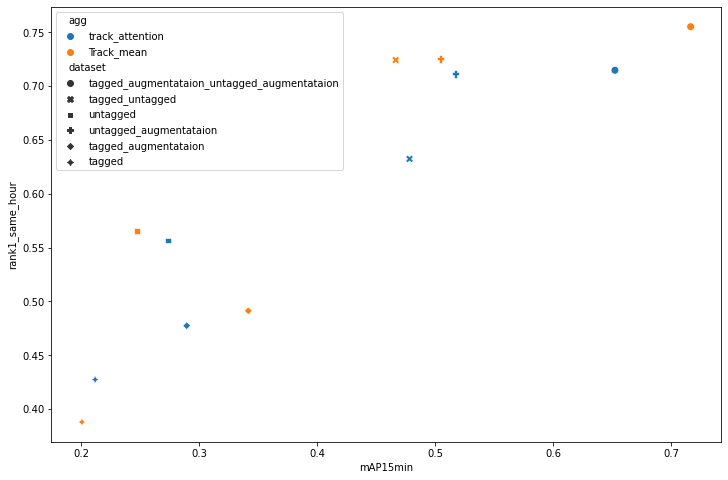

In [7]:
plt.figure(figsize=(12, 8))
ax=plt.gca()

sns.scatterplot(data=track_benchmark, x="mAP15min", y="rank1_same_hour", hue="agg", style="dataset", s=60)

<AxesSubplot:xlabel='mAP15min', ylabel='rank1_same_hour'>

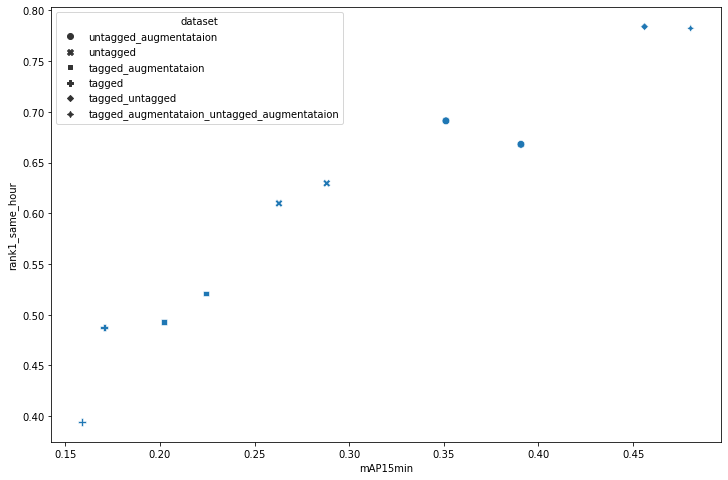

In [99]:
plt.figure(figsize=(12, 8))
ax=plt.gca()

sns.scatterplot(data=track_benchmark, x="mAP15min", y="rank1_same_hour", style="dataset", s=60)

<AxesSubplot:xlabel='mAP15min', ylabel='rank1_same_hour'>

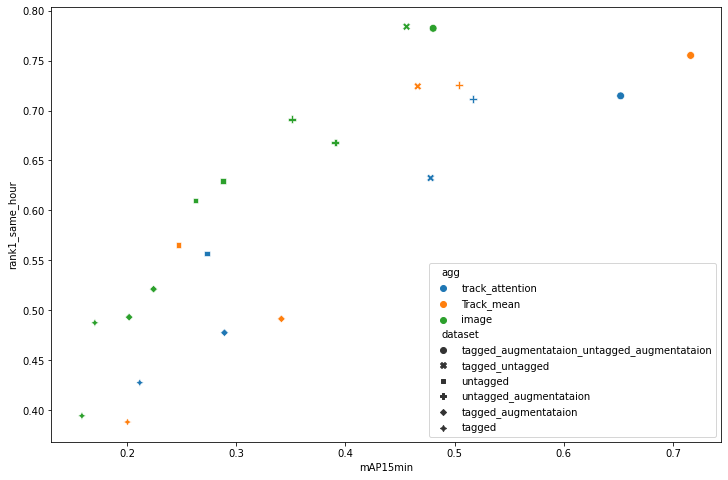

In [16]:
plt.figure(figsize=(12, 8))
ax=plt.gca()

sns.scatterplot(data=df, x="mAP15min", y="rank1_same_hour", hue="agg", style="dataset", s=60)
# plt.legend(False)

<AxesSubplot:xlabel='rank1_diff_day', ylabel='rank1_same_hour'>

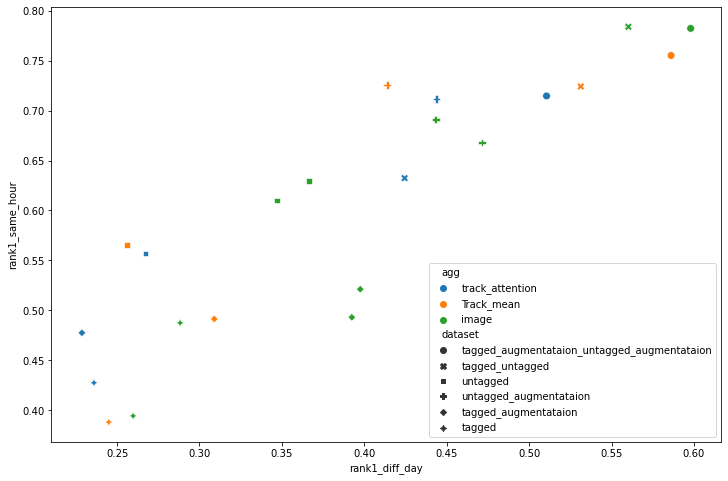

In [29]:
plt.figure(figsize=(12, 8))
ax=plt.gca()
sns.scatterplot(data=df, x="rank1_diff_day", y="rank1_same_hour", hue="agg", style="dataset", s=60)

<AxesSubplot:xlabel='filename'>

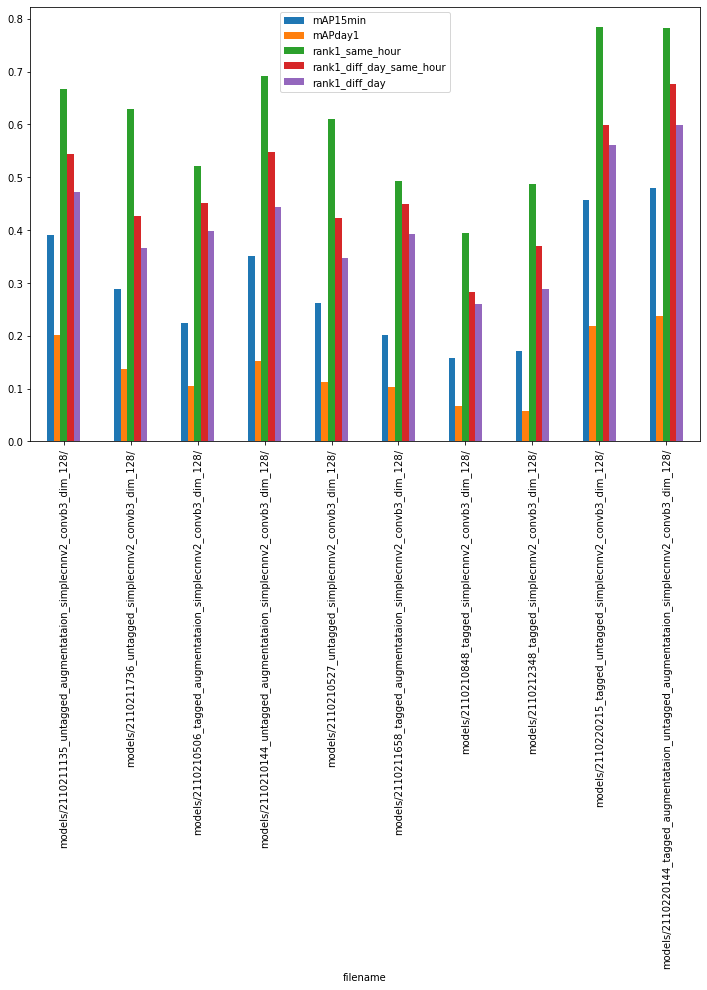

In [26]:
plt.figure(figsize=(12, 8))
ax=plt.gca()
df[df.level == "image"].plot(x="filename", kind="bar", ax=ax)